# Симплектический метод Рунге-Кутты. Осциллятор Якоби
## Загрузка пакета и выбор поля

In [82]:
RR=RealField(300)
load("fdm.sage")

## Начальная задача

In [83]:
var("p,q,r,t")
k=1/2
pr=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)

In [84]:
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -\frac{1}{4} \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. 


$$\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -\frac{1}{4} \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. $$

## Выбор таблицы Бутчера
Первый аргумент -- порядок, второй -- число стадий.

In [85]:
B=butcher_list(4,2,symplectic=True)
len(B)

2

In [86]:
B[0].latex(field=AA)

\begin{array}{c|cc}
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$

In [87]:
B[1].latex(field=AA)

\begin{array}{c|cc}
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}


$$\begin{array}{c|cc}
-\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{4} & -\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} \\
\frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{3}} + \frac{1}{4} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}
\end{array}$$

## Численное решение

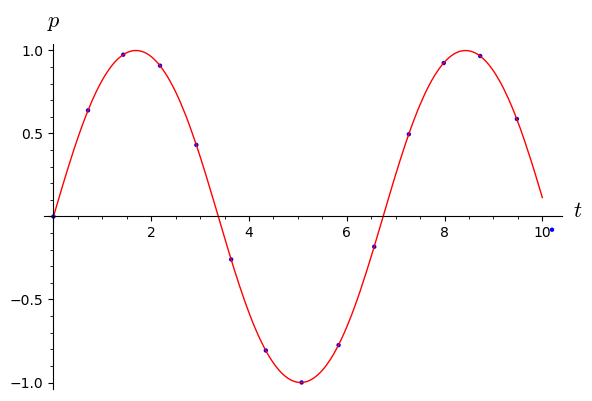

In [88]:
s=irk_adaptive(pr, h=1, eps=10^-10, M=10^2, tableau=B[0])
s.plot(t,p)+plot(jacobi('sn',t, k^2),(t,0,10), color='red')

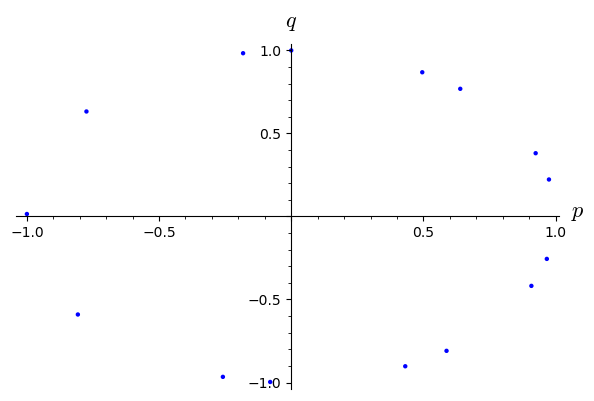

In [89]:
s.plot(p,q)

In [90]:
s.list()[-1]

[10.1973302128136752431331046864215750247240066528320312500000000000000000000000000000000000,
 -0.0795936866785466723092195362596333441205302375076808936082569159401330227182375528352592999,
 -0.996827389804125342546984685041923190802751008222006738418358263120777006317375549760257699,
 0.999207791835044204554144892146529876074784704174002222536861891993102876398517732992009062]

In [91]:
s.value(p,10)

0.117292755278282710968129421469141601722907467667395571326688601386553749933313038985822554

In [92]:
jacobi('sn',10.0, k^2)

0.114190123460750

## Оценка ошибки по методы Ричардсона

In [93]:
@parallel
def fu(n):
    return irk_adaptive(pr, h=1/2^n, eps=10^-10, M=10^2, tableau=B[0])
L=fu([n for n in range(12)])
LL=list(L)

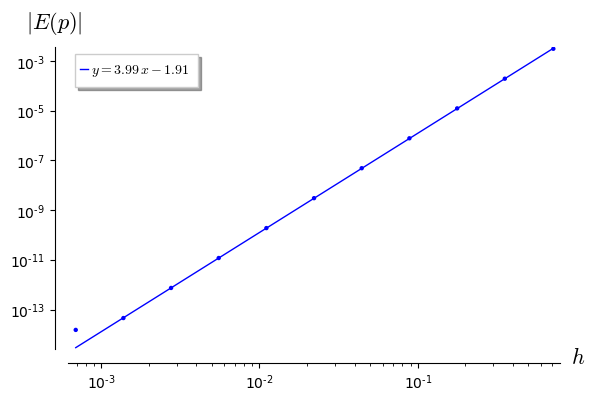

In [94]:
richardson_plot([LL[n][1] for n in range(12)],p,10, nmax=10)

In [95]:
richardson(LL[5][1],LL[4][1],p,10)

[0.114190126487815163475096618495708253829346804373861369729900643881960011661884128394942816,
 3.03025917673332169472797924962102471748945931350479870790818375616816326533127743063869517e-9]

In [96]:
LL[5][1].value(p,10) - jacobi('sn',10.0, k^2)

3.02706483490400e-9

In [97]:
richardson(LL[5][1],LL[4][1],p^2+q^2-1,10)

[-1.03992896475409354796508869525050694430416661876372637134277241563100842608280438031875498e-14,
 9.88299786090566595372939378884421438608398046703759741254529929530827832194224727702378783e-14]

## Выбор другой таблицы Бутчера

In [98]:
B=butcher_list(6,3,symplectic=True)
len(B)

6

In [99]:
B[0].latex(field=AA)

\begin{array}{c|ccc}
-\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{5}{36} & -\frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & -\sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & \frac{5}{36} & \sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} & \frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & -\frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & \frac{2}{9} \\
\hline
 & \frac{5}{18} & \frac{5}{18} & \frac{4}{9}
\end{array}


$$\begin{array}{c|ccc}
-\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{5}{36} & -\frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & -\sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} \, \sqrt{\frac{3}{5}} + \frac{1}{2} & \frac{1}{2} \, \sqrt{\frac{1}{15}} + \frac{5}{36} & \frac{5}{36} & \sqrt{\frac{1}{15}} + \frac{2}{9} \\
\frac{1}{2} & \frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & -\frac{1}{8} \, \sqrt{\frac{5}{3}} + \frac{5}{36} & \frac{2}{9} \\
\hline
 & \frac{5}{18} & \frac{5}{18} & \frac{4}{9}
\end{array}$$

In [100]:
@parallel
def fu(n):
    return irk_adaptive(pr, h=1/2^n, eps=10^-10, M=10^2, tableau=B[0])
L=fu([n for n in range(10)])
LL=list(L)

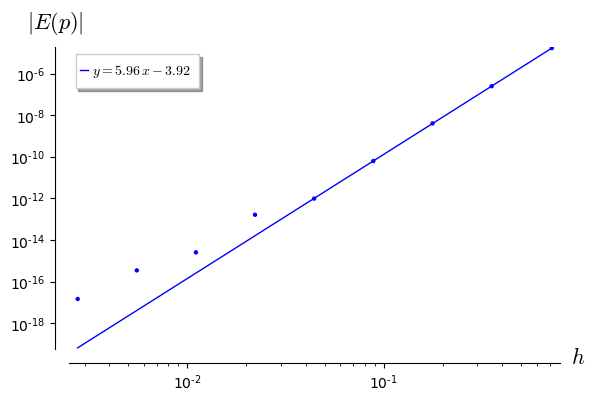

In [101]:
richardson_plot([LL[n][1] for n in range(10)],p,10, nmax=4)

In [102]:
B=butcher_list(2,1,symplectic=True)
len(B)

1

In [103]:
B[0].latex(field=AA)

\begin{array}{c|c}
\frac{1}{2} & \frac{1}{2} \\
\hline
 & 1
\end{array}


$$\begin{array}{c|c}
\frac{1}{2} & \frac{1}{2} \\
\hline
 & 1
\end{array}$$

In [104]:
@parallel
def fu(n):
    return irk_adaptive(pr, h=1/2^n, eps=10^-10, M=10^2, tableau=B[0])
L=fu([n for n in range(10)])
LL=list(L)

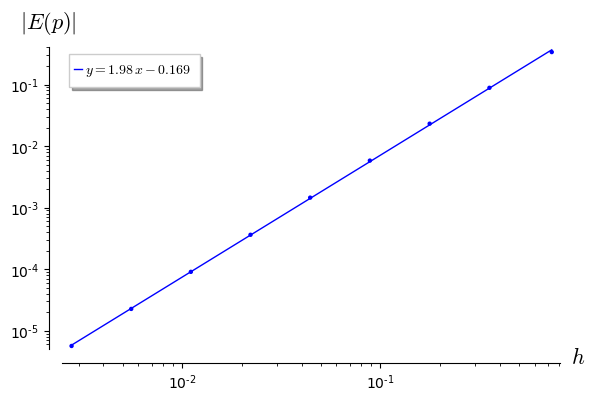

In [106]:
richardson_plot([LL[n][1] for n in range(10)],p,10)